In [19]:
import pandas as pd
import numpy as np
import os,sys
# use eda_helper from utils
sys.path.append('../')
from utils import eda_helper

In [20]:
df=pd.read_csv("../data/cleaned_data.csv")

In [21]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [22]:
# Assuming your DataFrame is called df and has the required columns
df = df.sort_values(by=['airport', 'year', 'month'])


In [23]:

# Create a datetime column (assumes monthly data, so using 1st of each month)
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')


In [24]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,date
177907,2015,1,DL,Delta Air Lines Network,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",24.0,3.0,0.60,0.00,...,0.63,1.0,0.0,67.0,12.0,0.0,35.0,0.0,20.0,2015-01-01
178059,2015,1,EV,ExpressJet Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",139.0,30.0,8.76,0.50,...,5.14,5.0,1.0,1216.0,517.0,42.0,411.0,0.0,246.0,2015-01-01
176749,2015,2,DL,Delta Air Lines Network,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",25.0,4.0,2.68,0.00,...,0.00,2.0,0.0,116.0,90.0,0.0,26.0,0.0,0.0,2015-02-01
176903,2015,2,EV,ExpressJet Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",139.0,44.0,14.23,2.51,...,15.41,8.0,0.0,2602.0,1076.0,151.0,408.0,0.0,967.0,2015-02-01
175593,2015,3,DL,Delta Air Lines Network,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",31.0,3.0,1.00,0.00,...,0.82,0.0,1.0,97.0,61.0,0.0,22.0,0.0,14.0,2015-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,2023,10,OO,SkyWest Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",136.0,17.0,11.00,0.00,...,6.00,1.0,0.0,721.0,540.0,0.0,0.0,0.0,181.0,2023-10-01
2860,2023,11,MQ,Envoy Air,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",23.0,3.0,1.15,0.00,...,1.85,0.0,0.0,124.0,51.0,0.0,0.0,0.0,73.0,2023-11-01
3245,2023,11,OO,SkyWest Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",121.0,17.0,10.95,0.97,...,0.24,0.0,0.0,2103.0,580.0,665.0,852.0,0.0,6.0,2023-11-01
665,2023,12,OO,SkyWest Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",121.0,15.0,7.27,1.67,...,2.90,0.0,0.0,1989.0,1709.0,82.0,101.0,0.0,97.0,2023-12-01


In [25]:

# Month sin and cos features
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


In [26]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,date,month_sin,month_cos
177907,2015,1,DL,Delta Air Lines Network,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",24.0,3.0,0.60,0.00,...,0.0,67.0,12.0,0.0,35.0,0.0,20.0,2015-01-01,5.000000e-01,8.660254e-01
178059,2015,1,EV,ExpressJet Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",139.0,30.0,8.76,0.50,...,1.0,1216.0,517.0,42.0,411.0,0.0,246.0,2015-01-01,5.000000e-01,8.660254e-01
176749,2015,2,DL,Delta Air Lines Network,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",25.0,4.0,2.68,0.00,...,0.0,116.0,90.0,0.0,26.0,0.0,0.0,2015-02-01,8.660254e-01,5.000000e-01
176903,2015,2,EV,ExpressJet Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",139.0,44.0,14.23,2.51,...,0.0,2602.0,1076.0,151.0,408.0,0.0,967.0,2015-02-01,8.660254e-01,5.000000e-01
175593,2015,3,DL,Delta Air Lines Network,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",31.0,3.0,1.00,0.00,...,1.0,97.0,61.0,0.0,22.0,0.0,14.0,2015-03-01,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,2023,10,OO,SkyWest Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",136.0,17.0,11.00,0.00,...,0.0,721.0,540.0,0.0,0.0,0.0,181.0,2023-10-01,-8.660254e-01,5.000000e-01
2860,2023,11,MQ,Envoy Air,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",23.0,3.0,1.15,0.00,...,0.0,124.0,51.0,0.0,0.0,0.0,73.0,2023-11-01,-5.000000e-01,8.660254e-01
3245,2023,11,OO,SkyWest Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",121.0,17.0,10.95,0.97,...,0.0,2103.0,580.0,665.0,852.0,0.0,6.0,2023-11-01,-5.000000e-01,8.660254e-01
665,2023,12,OO,SkyWest Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",121.0,15.0,7.27,1.67,...,0.0,1989.0,1709.0,82.0,101.0,0.0,97.0,2023-12-01,-2.449294e-16,1.000000e+00


In [27]:
df.drop(columns=['carrier_name','airport_name'],axis=1,inplace=True)

In [28]:
df.columns

Index(['year', 'month', 'carrier', 'airport', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'date', 'month_sin', 'month_cos'],
      dtype='object')

In [29]:
# Ensure sorting by time within each group
df = df.sort_values(by=['airport', 'carrier', 'year', 'month'])

# List of columns to apply EWMA to
ewma_cols = [
    'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted',
    'arr_delay',    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
     'carrier_delay','weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
]

# Compute EWMAs with lag=1 so that current value doesn't leak
ewma_span = 3
for col in ewma_cols:
    ewma_col = f'{col}_ewma'
    df[ewma_col] = (
        df.groupby(['airport', 'carrier'])[col]
        .transform(lambda x: x.shift(1).ewm(span=ewma_span, adjust=False).mean())
    )

In [30]:
df

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,carrier_ct_ewma,weather_ct_ewma,nas_ct_ewma,security_ct_ewma,late_aircraft_ct_ewma,carrier_delay_ewma,weather_delay_ewma,nas_delay_ewma,security_delay_ewma,late_aircraft_delay_ewma
136434,2018,2,9E,ABE,16.0,2.0,1.00,0.00,0.01,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134397,2018,3,9E,ABE,1.0,0.0,0.00,0.00,0.00,0.00,...,1.000000,0.000000,0.010000,0.000000e+00,0.990000,30.000000,0.00000,1.000000,0.000000,157.000000
132325,2018,4,9E,ABE,54.0,3.0,1.78,0.00,0.32,0.00,...,0.500000,0.000000,0.005000,0.000000e+00,0.495000,15.000000,0.00000,0.500000,0.000000,78.500000
130322,2018,5,9E,ABE,56.0,9.0,4.87,0.00,4.04,0.00,...,1.140000,0.000000,0.162500,0.000000e+00,0.702500,44.000000,0.00000,5.750000,0.000000,62.250000
128372,2018,6,9E,ABE,13.0,1.0,0.00,0.27,0.73,0.00,...,3.005000,0.000000,2.101250,0.000000e+00,0.401250,184.000000,0.00000,77.375000,0.000000,34.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24316,2022,12,YV,YUM,18.0,4.0,1.00,0.00,0.04,0.00,...,0.659732,0.001032,0.147420,9.155273e-07,1.014621,73.950116,0.14000,14.440829,0.000092,94.889999
22431,2023,1,YV,YUM,52.0,3.0,1.00,0.00,0.00,0.00,...,0.829866,0.000516,0.093710,4.577637e-07,1.987311,53.475058,0.07000,9.220415,0.000046,159.945000
20530,2023,2,YV,YUM,30.0,8.0,1.33,0.00,2.67,0.00,...,0.914933,0.000258,0.046855,2.288818e-07,1.993655,102.237529,0.03500,4.610207,0.000023,195.472500
18617,2023,3,YV,YUM,31.0,10.0,0.70,0.00,0.86,0.19,...,1.122466,0.000129,1.358427,1.144409e-07,2.996828,68.118765,0.01750,29.805104,0.000011,497.236250


In [31]:
df.columns

Index(['year', 'month', 'carrier', 'airport', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'date', 'month_sin', 'month_cos', 'arr_flights_ewma', 'arr_del15_ewma',
       'arr_cancelled_ewma', 'arr_diverted_ewma', 'arr_delay_ewma',
       'carrier_ct_ewma', 'weather_ct_ewma', 'nas_ct_ewma', 'security_ct_ewma',
       'late_aircraft_ct_ewma', 'carrier_delay_ewma', 'weather_delay_ewma',
       'nas_delay_ewma', 'security_delay_ewma', 'late_aircraft_delay_ewma'],
      dtype='object')

In [32]:
df

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,carrier_ct_ewma,weather_ct_ewma,nas_ct_ewma,security_ct_ewma,late_aircraft_ct_ewma,carrier_delay_ewma,weather_delay_ewma,nas_delay_ewma,security_delay_ewma,late_aircraft_delay_ewma
136434,2018,2,9E,ABE,16.0,2.0,1.00,0.00,0.01,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134397,2018,3,9E,ABE,1.0,0.0,0.00,0.00,0.00,0.00,...,1.000000,0.000000,0.010000,0.000000e+00,0.990000,30.000000,0.00000,1.000000,0.000000,157.000000
132325,2018,4,9E,ABE,54.0,3.0,1.78,0.00,0.32,0.00,...,0.500000,0.000000,0.005000,0.000000e+00,0.495000,15.000000,0.00000,0.500000,0.000000,78.500000
130322,2018,5,9E,ABE,56.0,9.0,4.87,0.00,4.04,0.00,...,1.140000,0.000000,0.162500,0.000000e+00,0.702500,44.000000,0.00000,5.750000,0.000000,62.250000
128372,2018,6,9E,ABE,13.0,1.0,0.00,0.27,0.73,0.00,...,3.005000,0.000000,2.101250,0.000000e+00,0.401250,184.000000,0.00000,77.375000,0.000000,34.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24316,2022,12,YV,YUM,18.0,4.0,1.00,0.00,0.04,0.00,...,0.659732,0.001032,0.147420,9.155273e-07,1.014621,73.950116,0.14000,14.440829,0.000092,94.889999
22431,2023,1,YV,YUM,52.0,3.0,1.00,0.00,0.00,0.00,...,0.829866,0.000516,0.093710,4.577637e-07,1.987311,53.475058,0.07000,9.220415,0.000046,159.945000
20530,2023,2,YV,YUM,30.0,8.0,1.33,0.00,2.67,0.00,...,0.914933,0.000258,0.046855,2.288818e-07,1.993655,102.237529,0.03500,4.610207,0.000023,195.472500
18617,2023,3,YV,YUM,31.0,10.0,0.70,0.00,0.86,0.19,...,1.122466,0.000129,1.358427,1.144409e-07,2.996828,68.118765,0.01750,29.805104,0.000011,497.236250


In [33]:
# save this dataframe to a csv file
df.to_csv("../data/modelling_1_data.csv", index=False)

## EDA for The new dataset

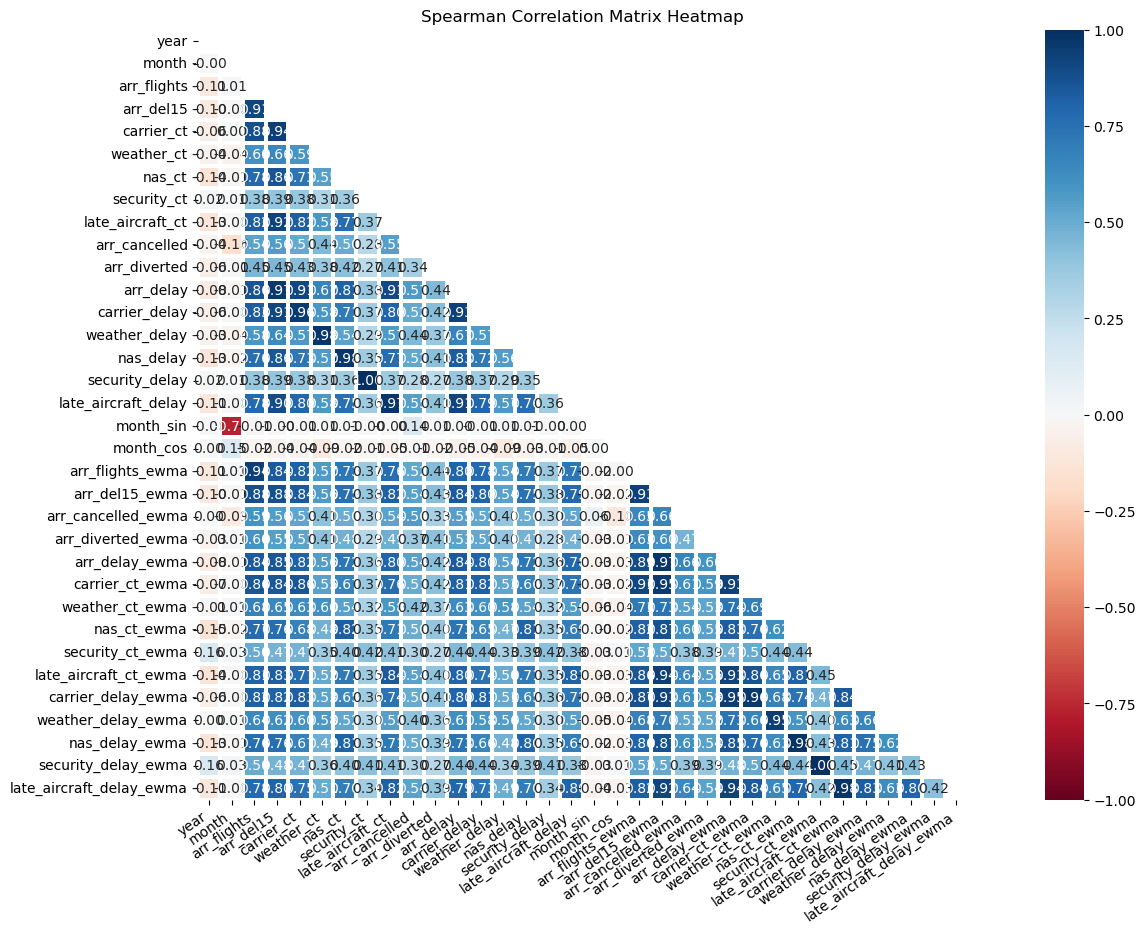

In [34]:
eda_helper.correlation_heatmap(df,figsize=(20,10))

# Dataset 2

## Creating a data set where i drop the COVID-19 Affected Years

In [35]:
# remove 2020 data
df_no_2020 = df[df['year'] != 2020]
# save this dataframe to a csv file
df_no_2020.to_csv("../data/modelling_2_data.csv", index=False)

# Dataset 3

In [36]:
df=pd.read_csv('../data/cleaned_data.csv')

In [37]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.00,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.00,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.00,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.00,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.00,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178742,2015,1,WN,Southwest Airlines,ONT,"Ontario, CA: Ontario International",892.0,184.0,59.21,2.61,...,0.98,98.79,3.0,2.0,8431.0,2661.0,123.0,1029.0,92.0,4526.0
178743,2015,1,WN,Southwest Airlines,ORF,"Norfolk, VA: Norfolk International",151.0,45.0,18.00,2.01,...,0.00,17.80,0.0,0.0,2391.0,840.0,295.0,301.0,0.0,955.0
178744,2015,1,WN,Southwest Airlines,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",251.0,68.0,25.17,0.08,...,0.00,27.83,6.0,0.0,3405.0,1003.0,9.0,534.0,0.0,1859.0
178745,2015,1,WN,Southwest Airlines,PDX,"Portland, OR: Portland International",793.0,173.0,64.00,1.27,...,0.00,86.60,0.0,1.0,7479.0,2370.0,143.0,689.0,0.0,4277.0


In [38]:
df = df.sort_values(by=['airport', 'year', 'month'])

# Create a datetime column (assumes monthly data, so using 1st of each month)
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

# Month sin and cos features
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df.drop(columns=['carrier_name','airport_name'],axis=1,inplace=True)


In [39]:
# Ensure sorting by time within each group
df = df.sort_values(by=['airport', 'carrier', 'year', 'month'])

# List of columns to apply EWMA to
ewma_cols = [
    'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted',
    'arr_delay',    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
     'carrier_delay','weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
]

# Compute EWMAs with lag=1 so that current value doesn't leak
ewma_span = 3
for col in ewma_cols:
    ewma_col = f'{col}_ewma'
    df[ewma_col] = (
        df.groupby(['airport', 'carrier'])[col]
        .transform(lambda x: x.shift(1).ewm(span=ewma_span, adjust=False).mean())
    )

In [40]:
df

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,carrier_ct_ewma,weather_ct_ewma,nas_ct_ewma,security_ct_ewma,late_aircraft_ct_ewma,carrier_delay_ewma,weather_delay_ewma,nas_delay_ewma,security_delay_ewma,late_aircraft_delay_ewma
136434,2018,2,9E,ABE,16.0,2.0,1.00,0.00,0.01,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134397,2018,3,9E,ABE,1.0,0.0,0.00,0.00,0.00,0.00,...,1.000000,0.000000,0.010000,0.000000e+00,0.990000,30.000000,0.00000,1.000000,0.000000,157.000000
132325,2018,4,9E,ABE,54.0,3.0,1.78,0.00,0.32,0.00,...,0.500000,0.000000,0.005000,0.000000e+00,0.495000,15.000000,0.00000,0.500000,0.000000,78.500000
130322,2018,5,9E,ABE,56.0,9.0,4.87,0.00,4.04,0.00,...,1.140000,0.000000,0.162500,0.000000e+00,0.702500,44.000000,0.00000,5.750000,0.000000,62.250000
128372,2018,6,9E,ABE,13.0,1.0,0.00,0.27,0.73,0.00,...,3.005000,0.000000,2.101250,0.000000e+00,0.401250,184.000000,0.00000,77.375000,0.000000,34.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24316,2022,12,YV,YUM,18.0,4.0,1.00,0.00,0.04,0.00,...,0.659732,0.001032,0.147420,9.155273e-07,1.014621,73.950116,0.14000,14.440829,0.000092,94.889999
22431,2023,1,YV,YUM,52.0,3.0,1.00,0.00,0.00,0.00,...,0.829866,0.000516,0.093710,4.577637e-07,1.987311,53.475058,0.07000,9.220415,0.000046,159.945000
20530,2023,2,YV,YUM,30.0,8.0,1.33,0.00,2.67,0.00,...,0.914933,0.000258,0.046855,2.288818e-07,1.993655,102.237529,0.03500,4.610207,0.000023,195.472500
18617,2023,3,YV,YUM,31.0,10.0,0.70,0.00,0.86,0.19,...,1.122466,0.000129,1.358427,1.144409e-07,2.996828,68.118765,0.01750,29.805104,0.000011,497.236250


In [41]:
# Ensure proper sorting
df = df.sort_values(by=['airport', 'carrier', 'month', 'year']).reset_index(drop=True)

# Initialize new column
df['past_years_monthly_ewma'] = np.nan

# Set EWMA span (adjustable)
ewma_span = 3

# Create a helper structure to cache grouped rows
grouped = df.groupby(['airport', 'carrier', 'month'])

# Loop over each group
for (airport, carrier, month), group_df in grouped:
    group_df = group_df.sort_values('year')
    
    ewma_vals = []
    ewma = None
    
    for i, row in group_df.iterrows():
        if ewma is None:
            ewma_vals.append(np.nan)  # No prior years
        else:
            ewma_vals.append(ewma)

        # Update EWMA **after** storing current value (to avoid using it for itself)
        val = row['arr_delay']
        if ewma is None or pd.isna(ewma):
            ewma = val
        else:
            ewma = ewma * (1 - 2 / (ewma_span + 1)) + val * (2 / (ewma_span + 1))
    
    # Assign EWMA back to main df
    df.loc[group_df.index, 'past_years_monthly_ewma'] = ewma_vals

In [42]:
df

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,weather_ct_ewma,nas_ct_ewma,security_ct_ewma,late_aircraft_ct_ewma,carrier_delay_ewma,weather_delay_ewma,nas_delay_ewma,security_delay_ewma,late_aircraft_delay_ewma,past_years_monthly_ewma
0,2019,1,9E,ABE,40.0,8.0,3.48,0.0,2.18,0.0,...,0.287031,1.766113,0.000000e+00,2.881582,340.750000,26.937500,46.224609,0.000000,204.533203,NaN
1,2020,1,9E,ABE,50.0,6.0,4.88,0.0,0.94,0.0,...,0.153117,0.213864,0.000000e+00,2.130120,147.069519,8.108139,6.091852,0.000000,137.650277,387.00
2,2021,1,9E,ABE,110.0,1.0,0.63,0.0,0.38,0.0,...,0.057317,0.157476,0.000000e+00,0.748243,61.062772,2.766047,4.832390,0.000000,27.533790,389.00
3,2022,1,9E,ABE,119.0,14.0,5.43,1.0,6.83,0.0,...,0.041660,3.525937,0.000000e+00,2.299265,258.827408,2.174503,96.235067,0.000000,106.932992,210.50
4,2023,1,9E,ABE,14.0,1.0,0.00,1.0,0.00,0.0,...,0.291647,1.509828,1.296875e-02,0.752849,229.284482,9.285838,77.758731,0.390625,33.093488,381.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178742,2022,11,YV,YUM,2.0,0.0,0.00,0.0,0.00,0.0,...,0.002065,0.294839,1.831055e-06,2.029243,147.900232,0.280000,28.881659,0.000183,189.779999,551.00
178743,2019,12,YV,YUM,59.0,19.0,3.72,0.0,3.77,0.0,...,0.013125,1.908281,0.000000e+00,3.155937,227.125000,1.875000,55.500000,0.000000,259.921875,NaN
178744,2020,12,YV,YUM,30.0,4.0,3.09,0.0,0.00,0.0,...,0.004036,0.116321,0.000000e+00,0.799789,50.023926,0.522949,3.126953,0.000000,31.874695,1178.00
178745,2021,12,YV,YUM,38.0,8.0,3.66,1.0,0.86,0.0,...,0.057035,1.357770,9.375000e-04,4.632178,138.918969,3.359886,46.409304,0.093750,335.359253,996.50


In [43]:
# remove month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,carrrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,date

In [44]:
# save this as modelling_3_data.csv
df.to_csv("../data/modelling_3_data.csv", index=False)

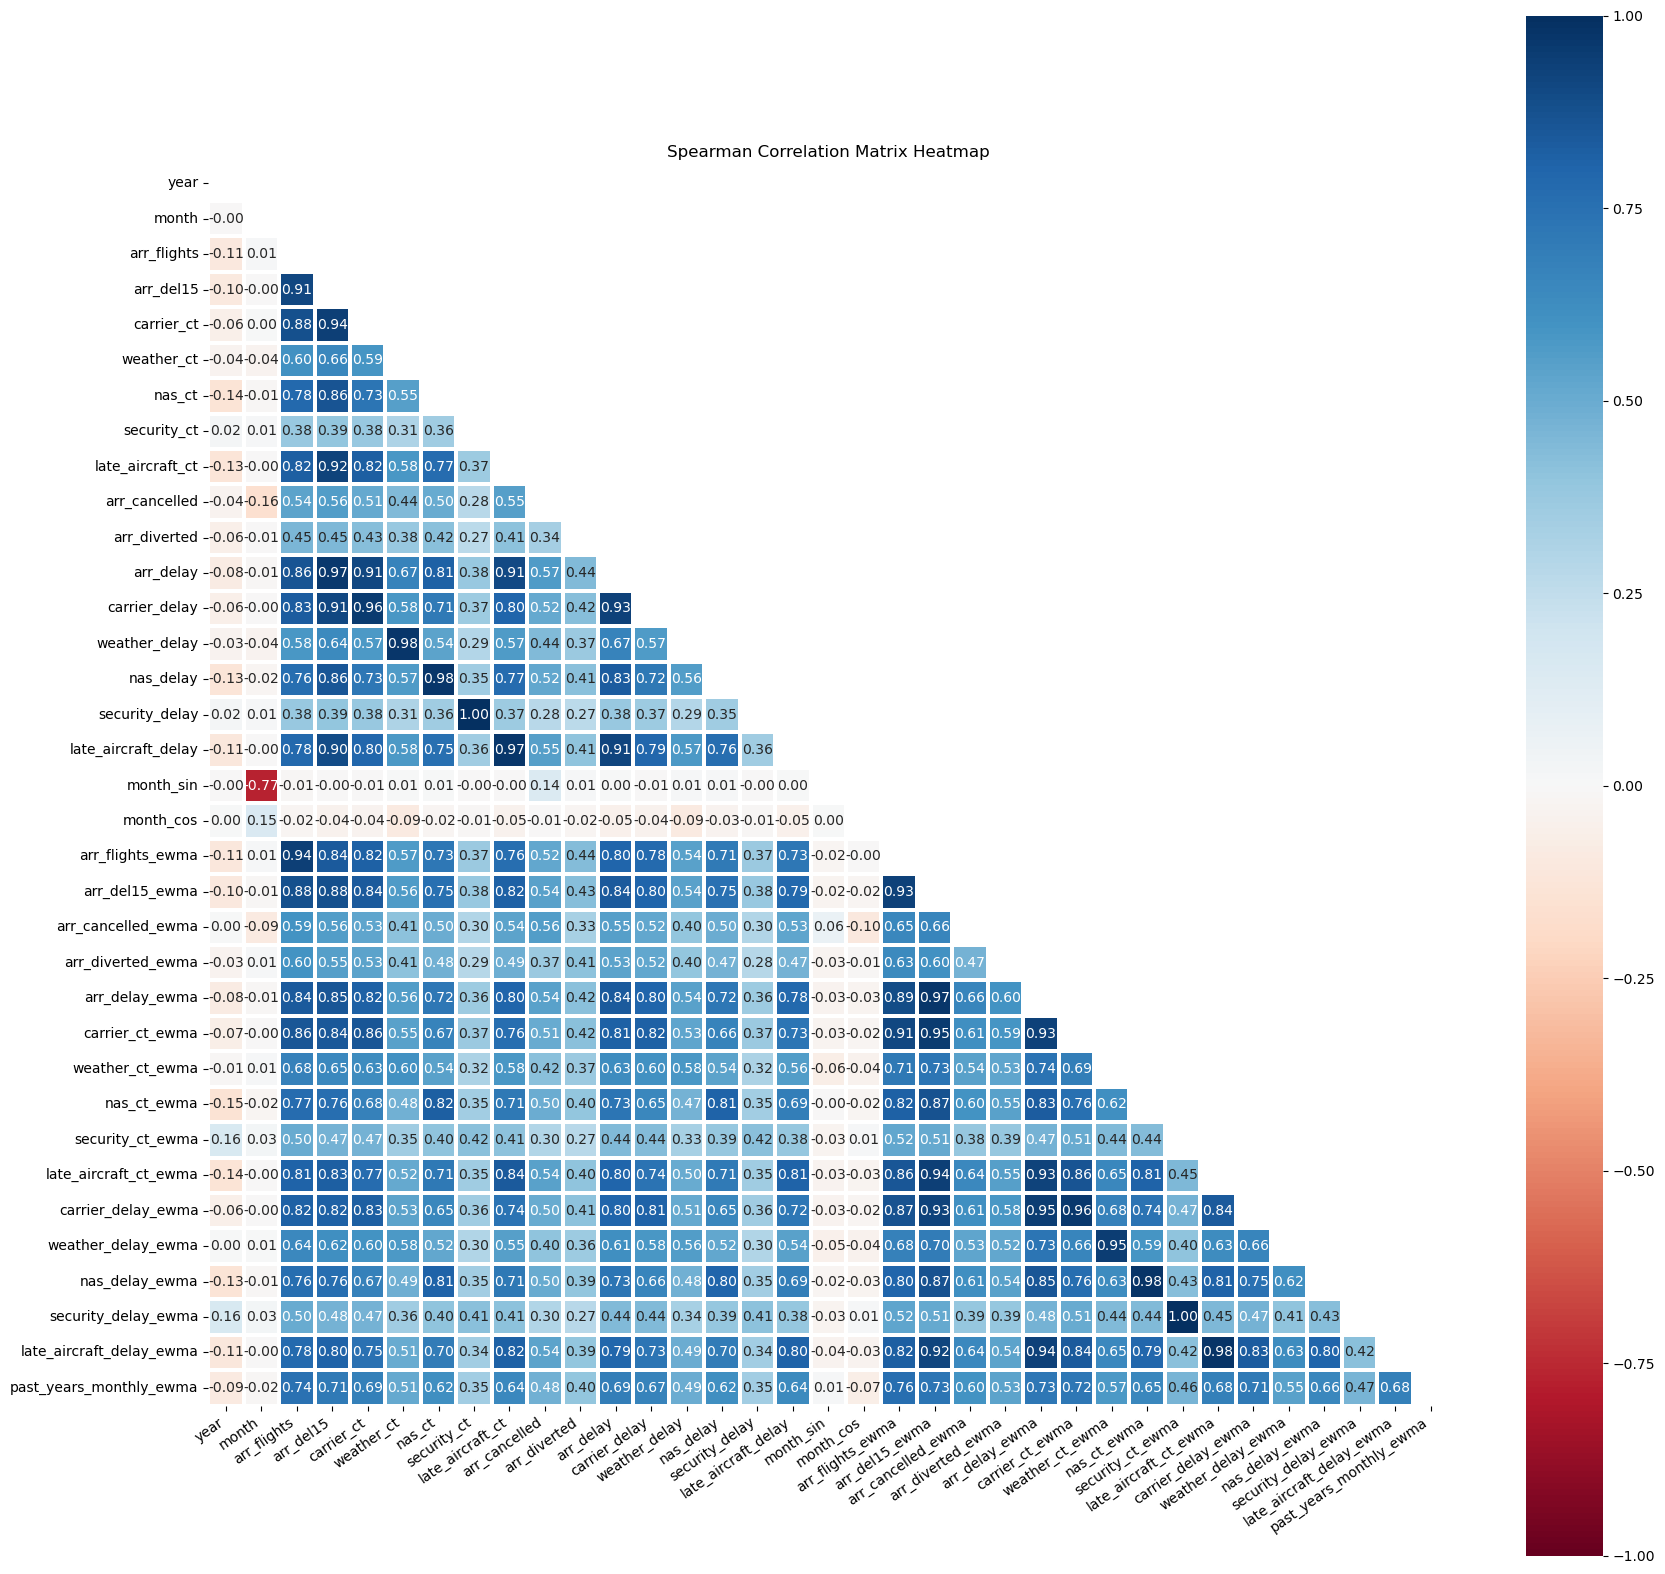

In [45]:
eda_helper.correlation_heatmap(df, figsize=(20, 20))

# Dataset-4

In [46]:
# make a new column called is_covid_year which is 1 if year is 2020 else 0
df['is_covid_year'] = df['year'].apply(lambda x: 1 if x == 2020 else 0)

In [47]:
df

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,nas_ct_ewma,security_ct_ewma,late_aircraft_ct_ewma,carrier_delay_ewma,weather_delay_ewma,nas_delay_ewma,security_delay_ewma,late_aircraft_delay_ewma,past_years_monthly_ewma,is_covid_year
0,2019,1,9E,ABE,40.0,8.0,3.48,0.0,2.18,0.0,...,1.766113,0.000000e+00,2.881582,340.750000,26.937500,46.224609,0.000000,204.533203,NaN,0
1,2020,1,9E,ABE,50.0,6.0,4.88,0.0,0.94,0.0,...,0.213864,0.000000e+00,2.130120,147.069519,8.108139,6.091852,0.000000,137.650277,387.00,1
2,2021,1,9E,ABE,110.0,1.0,0.63,0.0,0.38,0.0,...,0.157476,0.000000e+00,0.748243,61.062772,2.766047,4.832390,0.000000,27.533790,389.00,0
3,2022,1,9E,ABE,119.0,14.0,5.43,1.0,6.83,0.0,...,3.525937,0.000000e+00,2.299265,258.827408,2.174503,96.235067,0.000000,106.932992,210.50,0
4,2023,1,9E,ABE,14.0,1.0,0.00,1.0,0.00,0.0,...,1.509828,1.296875e-02,0.752849,229.284482,9.285838,77.758731,0.390625,33.093488,381.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178742,2022,11,YV,YUM,2.0,0.0,0.00,0.0,0.00,0.0,...,0.294839,1.831055e-06,2.029243,147.900232,0.280000,28.881659,0.000183,189.779999,551.00,0
178743,2019,12,YV,YUM,59.0,19.0,3.72,0.0,3.77,0.0,...,1.908281,0.000000e+00,3.155937,227.125000,1.875000,55.500000,0.000000,259.921875,NaN,0
178744,2020,12,YV,YUM,30.0,4.0,3.09,0.0,0.00,0.0,...,0.116321,0.000000e+00,0.799789,50.023926,0.522949,3.126953,0.000000,31.874695,1178.00,1
178745,2021,12,YV,YUM,38.0,8.0,3.66,1.0,0.86,0.0,...,1.357770,9.375000e-04,4.632178,138.918969,3.359886,46.409304,0.093750,335.359253,996.50,0


In [48]:
# save this dataframe to a csv file
df.to_csv("../data/modelling_4_data.csv", index=False)

In [49]:
df                

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,...,nas_ct_ewma,security_ct_ewma,late_aircraft_ct_ewma,carrier_delay_ewma,weather_delay_ewma,nas_delay_ewma,security_delay_ewma,late_aircraft_delay_ewma,past_years_monthly_ewma,is_covid_year
0,2019,1,9E,ABE,40.0,8.0,3.48,0.0,2.18,0.0,...,1.766113,0.000000e+00,2.881582,340.750000,26.937500,46.224609,0.000000,204.533203,NaN,0
1,2020,1,9E,ABE,50.0,6.0,4.88,0.0,0.94,0.0,...,0.213864,0.000000e+00,2.130120,147.069519,8.108139,6.091852,0.000000,137.650277,387.00,1
2,2021,1,9E,ABE,110.0,1.0,0.63,0.0,0.38,0.0,...,0.157476,0.000000e+00,0.748243,61.062772,2.766047,4.832390,0.000000,27.533790,389.00,0
3,2022,1,9E,ABE,119.0,14.0,5.43,1.0,6.83,0.0,...,3.525937,0.000000e+00,2.299265,258.827408,2.174503,96.235067,0.000000,106.932992,210.50,0
4,2023,1,9E,ABE,14.0,1.0,0.00,1.0,0.00,0.0,...,1.509828,1.296875e-02,0.752849,229.284482,9.285838,77.758731,0.390625,33.093488,381.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178742,2022,11,YV,YUM,2.0,0.0,0.00,0.0,0.00,0.0,...,0.294839,1.831055e-06,2.029243,147.900232,0.280000,28.881659,0.000183,189.779999,551.00,0
178743,2019,12,YV,YUM,59.0,19.0,3.72,0.0,3.77,0.0,...,1.908281,0.000000e+00,3.155937,227.125000,1.875000,55.500000,0.000000,259.921875,NaN,0
178744,2020,12,YV,YUM,30.0,4.0,3.09,0.0,0.00,0.0,...,0.116321,0.000000e+00,0.799789,50.023926,0.522949,3.126953,0.000000,31.874695,1178.00,1
178745,2021,12,YV,YUM,38.0,8.0,3.66,1.0,0.86,0.0,...,1.357770,9.375000e-04,4.632178,138.918969,3.359886,46.409304,0.093750,335.359253,996.50,0
